In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from nn_utilities import *
from fd_model_nn import FD_Network
from utilities import *
from tensorflow.keras.callbacks import EarlyStopping

# ATTEMPTS WITH VARIOUS DIFFERENT SCENARIOS

In [3]:
corridor_30_results = {'(1,)': {'tr': (0.01262977423146367, 0.0004127846182246546), 'val': (0.013154482580721378, 0.00046061958140566716), 'test': (0.01288361999290932, 0.00018229439834367304)}, 
'(2,)': {'tr': (0.011538316439837219, 0.0004941108979969975), 'val': (0.01249925512820482, 0.0006318710590386238), 'test': (0.012508606474898787, 0.0002469853850752613)}, 
'(3,)': {'tr': (0.011129431296139957, 0.0005970115740365477), 'val': (0.012320313565433026, 0.0006322344205738093), 'test': (0.01239412819759469, 0.00021392860968342934)}, 
'(4, 2)': {'tr': (0.010888327900320292, 0.0005645756167551163), 'val': (0.012081360649317504, 0.0004218669603715056), 'test': (0.012369421973580237, 0.0005166539995045363)}, 
'(5, 2)': {'tr': (0.010493993125855921, 0.000835649478515386), 'val': (0.011810790300369262, 0.0008214068201585462), 'test': (0.012149790975389287, 0.00017063005462694236)}, 
'(5, 3)': {'tr': (0.01040523873642087, 0.000896238969922755), 'val': (0.011774615943431854, 0.0006561110549846406), 'test': (0.012044799717730852, 0.00029100208053976263)}, 
'(6, 3)': {'tr': (0.010356380194425582, 0.0004923185513636355), 'val': (0.01185028439387679, 0.0004095531187095662), 'test': (0.012083048750901115, 0.0001470802890341071)}, 
'(10, 4)': {'tr': (0.00905075192451477, 0.00041083540622956606), 'val': (0.010977945439517498, 0.0006262889727623127), 'test': (0.01159878536373124, 0.00014952305229616762)}}

corridor_85_results = {'(1,)': {'tr': (0.045258586704730985, 0.004853406766732973), 'val': (0.04714435026049614, 0.004653697406037759), 'test': (0.04686351530840396, 0.0012961715061691429)}, 
'(2,)': {'tr': (0.03719027779996395, 0.0020733957764011005), 'val': (0.041013209708034994, 0.0023950303734451657), 'test': (0.041472892633610745, 0.0024322010449302914)}, 
'(3,)': {'tr': (0.034038560874760156, 0.0013176987634252566), 'val': (0.03938843499869109, 0.0014865264094550156), 'test': (0.03914595563880523, 0.0010876265935449074)}, 
'(4, 2)': {'tr': (0.03526925183832645, 0.0029871246019426367), 'val': (0.04105438970029355, 0.0023958553187249138), 'test': (0.04126933727288883, 0.002845698267115585)}, 
'(5, 2)': {'tr': (0.035543992817401886, 0.0037010336212553643), 'val': (0.04197082627564668, 0.0025311766537130707), 'test': (0.04235170498124496, 0.00310823593982254)}, 
'(5, 3)': {'tr': (0.0334813929721713, 0.0037666412204319824), 'val': (0.041099048890173434, 0.003189935635059386), 'test': (0.04175731243589502, 0.003266454835106925)}, 
'(6, 3)': {'tr': (0.03116175480186939, 0.0022358561594462813), 'val': (0.03927014149725437, 0.002838615402109067), 'test': (0.039632171653358556, 0.001673111008447824)}, 
'(10, 4)': {'tr': (0.03036436103284359, 0.0047435348802268695), 'val': (0.0395459621399641, 0.003676904672583768), 'test': (0.03933931185179666, 0.002598055735067817)}}

corridor_140_results = {'(1,)': {'tr': (0.04291036047041416, 0.005824563471412332), 'val': (0.04382776025682687, 0.006394844256567953), 'test': (0.04436331604526039, 0.005793175051406907)}, 
'(2,)': {'tr': (0.030837520547211172, 0.004751342825048035), 'val': (0.033473274633288384, 0.0033827028892333627), 'test': (0.03378857116046191, 0.0039617804044175505)}, 
'(3,)': {'tr': (0.026549312584102154, 0.0025887104995903575), 'val': (0.030712138414382934, 0.00239518947015756), 'test': (0.030885775140055527, 0.0028191616118913632)}, 
'(4, 2)': {'tr': (0.029781400188803674, 0.0077334687329517525), 'val': (0.0341630595549941, 0.006559810710432661), 'test': (0.03564499776092213, 0.008119999565798364)}, 
'(5, 2)': {'tr': (0.026851211041212082, 0.007672321045244769), 'val': (0.030404813252389428, 0.004847593028122708), 'test': (0.03220185558130239, 0.005889302402353403)}, 
'(5, 3)': {'tr': (0.0270224241912365, 0.006174432484881431), 'val': (0.02984722938388586, 0.0038025682267235944), 'test': (0.03257381413735577, 0.006320370030920377)}, 
'(6, 3)': {'tr': (0.026414520479738718, 0.00683934028421603), 'val': (0.031423465646803386, 0.004522380706006448), 'test': (0.031857456997041, 0.005524142998706357)}, 
'(10, 4)': {'tr': (0.02273985404521227, 0.004553421199614998), 'val': (0.02864274427294731, 0.004004773533224363), 'test': (0.029942636128836318, 0.004020629164617923)}}

bottleneck_070_results = {'(1,)': {'tr': (0.04955769553780556, 0.0057570421608399685), 'val': (0.05123388793319463, 0.005096320416198529), 'test': (0.051791704269027836, 0.005582774144924822)}, 
'(2,)': {'tr': (0.04184448003768921, 0.004760314561714955), 'val': (0.045550852119922644, 0.0046212267515334735), 'test': (0.04491133585904681, 0.0022928527407057274)}, 
'(3,)': {'tr': (0.04102290675044059, 0.003348045017959455), 'val': (0.04824198216199875, 0.004444882233662878), 'test': (0.04584651970424176, 0.002920595092481756)}, 
'(4, 2)': {'tr': (0.04031206876039505, 0.0051648797471331685), 'val': (0.048427933976054195, 0.0037716492903911523), 'test': (0.04719023609986878, 0.004526066784584657)}, 
'(5, 2)': {'tr': (0.03668047532439232, 0.003667154431939146), 'val': (0.04531076699495316, 0.0025808096847436896), 'test': (0.0461659374304043, 0.0027352878110425798)}, 
'(5, 3)': {'tr': (0.04162880904972553, 0.007151998469464794), 'val': (0.049127314463257785, 0.005513828520265613), 'test': (0.049083456967275084, 0.005650612198688121)}, 
'(6, 3)': {'tr': (0.037646884098649025, 0.005999453764399783), 'val': (0.04634510710835457, 0.004201980591786483), 'test': (0.04620908804838612, 0.0035137353907239953)}, 
'(10, 4)': {'tr': (0.036670266091823576, 0.00472639424911708), 'val': (0.04604802552610636, 0.003957607023497358), 'test': (0.045713807815980285, 0.003483159691551754)}}

bottleneck_120_results = {'(1,)': {'tr': (0.045476525351405145, 0.0034633781661747636), 'val': (0.047511987984180444, 0.0035279194455248527), 'test': (0.048413375369388105, 0.002522003039164646)}, 
'(2,)': {'tr': (0.04224360480904579, 0.003506859080301349), 'val': (0.046193650886416436, 0.0031272720054366793), 'test': (0.04625286046127057, 0.0022125453627997982)}, 
'(3,)': {'tr': (0.03858987495303154, 0.002671119954889929), 'val': (0.04430860459804535, 0.0027157726234042193), 'test': (0.04470461421467471, 0.0010606345597737859)}, 
'(4, 2)': {'tr': (0.0394828798621893, 0.00517953882272561), 'val': (0.04747614659368992, 0.004553359946353866), 'test': (0.048298225549071205, 0.004111722579294067)}, 
'(5, 2)': {'tr': (0.0381364968419075, 0.004438003066403954), 'val': (0.04704980656504631, 0.003722231935710756), 'test': (0.04857316286432897, 0.0035492809359175402)}, 
'(5, 3)': {'tr': (0.03634794570505619, 0.003913022708673728), 'val': (0.04499102778732776, 0.0034655888864897574), 'test': (0.04650701782928805, 0.0031319673718845963)}, 
'(6, 3)': {'tr': (0.038392788544297216, 0.006043361708867561), 'val': (0.04624851040542126, 0.004497909805504629), 'test': (0.04844175237181768, 0.004853182351753698)}, 
'(10, 4)': {'tr': (0.03385196726769209, 0.003615533945624023), 'val': (0.044425726979970936, 0.0027250517699852323), 'test': (0.04527146680715299, 0.0028587616390998542)}}

bottleneck_180_results = {'(1,)': {'tr': (0.033769665695726876, 0.002552604748078953), 'val': (0.03528949625790119, 0.002585573285757077), 'test': (0.03504237054569127, 0.002002002665577862)}, 
'(2,)': {'tr': (0.030869273804128166, 0.002305927721896861), 'val': (0.03384587962180376, 0.0023586936013644546), 'test': (0.03243234185262013, 0.0006866033363514358)}, 
'(3,)': {'tr': (0.027929570898413664, 0.0029547061687996393), 'val': (0.031504483260214336, 0.002699934739993706), 'test': (0.031684836193923004, 0.001045656878796912)}, 
'(4, 2)': {'tr': (0.030895430967211722, 0.0038421324431520865), 'val': (0.034928697943687435, 0.002954860923083888), 'test': (0.03501300235703424, 0.0028131718999108908)}, 
'(5, 2)': {'tr': (0.027379923760890962, 0.0038991080896199188), 'val': (0.03222468722611666, 0.0028437898469709), 'test': (0.033922969614848156, 0.002292811623967401)}, 
'(5, 3)': {'tr': (0.027455363385379315, 0.002900168557128682), 'val': (0.03304103620350361, 0.0026987548264617244), 'test': (0.033113406288243635, 0.0016651353914404774)}, 
'(6, 3)': {'tr': (0.028664349503815172, 0.0032454153274787075), 'val': (0.03402393605560064, 0.002724596515028621), 'test': (0.034047556292832945, 0.001860900325841806)}, 
'(10, 4)': {'tr': (0.024174300655722618, 0.0031015519602549694), 'val': (0.03141755178570747, 0.0028595141966270103), 'test': (0.03214170199275125, 0.0013953394628899662)}}


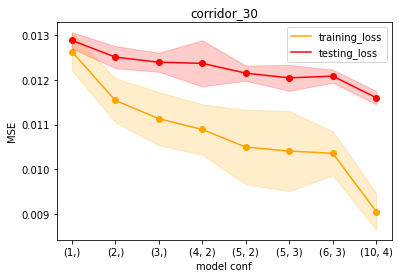

In [4]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_30_results)
plot_results(corridor_30_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_30")

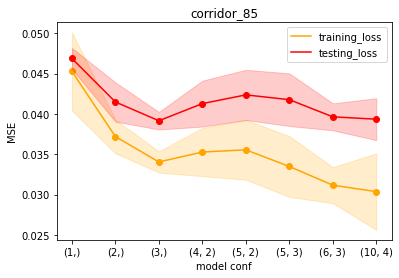

In [5]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_85_results)
plot_results(corridor_85_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_85")

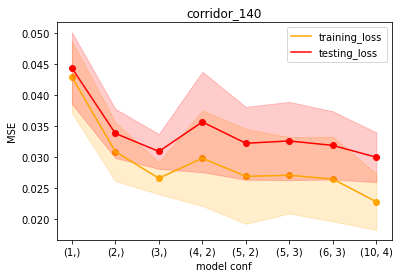

In [6]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_140_results)
plot_results(corridor_140_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_140")

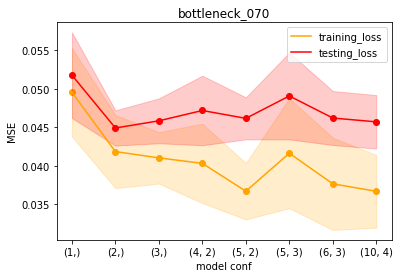

In [7]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_070_results)
plot_results(bottleneck_070_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_070")

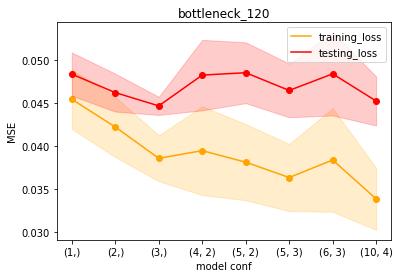

In [8]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_120_results)
plot_results(bottleneck_120_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_120")

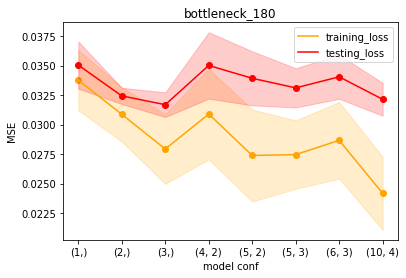

In [9]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_180_results)
plot_results(bottleneck_180_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_180")